# Cardinality maps or voxets as a local measure of uncertainty
For an ensemble of 2D or 3D voxets here, cardinality is computed for each voxel of the domain as the number of different occuring values. 

In [1]:
# import modules
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime
import pickle
from uncertaintyIndicators import cardinality

picklefilenamecardinality = "./pickledata/testing-model-subset-cardinality.pickle"
picklefilenamedata = "./pickledata/testing-model-subset.pickle"
sample_num1 = 9
sample_num2 = 2
myseed = 65432

# import data
with open(picklefilenamedata, 'rb') as f:
    [grv_all,mag_all,mod_all,rho_all,sus_all,cmap,samples_ix] = pickle.load(f)


## Categorical variables
Cardinality can only be computed on categorical variables.

In [2]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING CARDINALITY START ")
crd=cardinality(mod_all)   
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING CARDINALITY END")


03-Jun-2021 (22:22:20) - COMPUTING CARDINALITY START 
03-Jun-2021 (22:22:30) - COMPUTING CARDINALITY END


## Continuous variables
One possibility could be to discretize the continuous field in nbins.
Here we prefer to look at the range (max-min) of the continuous variable, at its standard deviation or at a combination of both.

In [3]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING RANGE & STD START")
# range
rho_min = np.amin(rho_all,3)
rho_max = np.amax(rho_all,3)
rho_rng = rho_max-rho_min
sus_min = np.amin(sus_all,3)
sus_max = np.amax(sus_all,3)
sus_rng = sus_max-sus_min
grv_min = np.amin(grv_all,2)
grv_max = np.amax(grv_all,2)
grv_rng = grv_max-grv_min
mag_min = np.amin(mag_all,2)
mag_max = np.amax(mag_all,2)
mag_rng = mag_max-mag_min
# standard deviation
rho_std = np.std(rho_all,3)
sus_std = np.std(sus_all,3)
grv_std = np.std(grv_all,2)
mag_std = np.std(mag_all,2)
# mixte indicator composed of normalized maps or voxets
mag_rngstd = (mag_std/np.amax(mag_std) + mag_rng/np.amax(mag_rng))/2
grv_rngstd = (grv_std/np.amax(grv_std) + grv_rng/np.amax(grv_rng))/2
rho_rngstd = (rho_std/np.amax(rho_std) + rho_rng/np.amax(rho_rng))/2
sus_rngstd = (sus_std/np.amax(sus_std) + sus_rng/np.amax(sus_rng))/2
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING RANGE & STD END")


03-Jun-2021 (22:22:30) - COMPUTING RANGE & STD START
03-Jun-2021 (22:22:34) - COMPUTING RANGE & STD END


## Plot

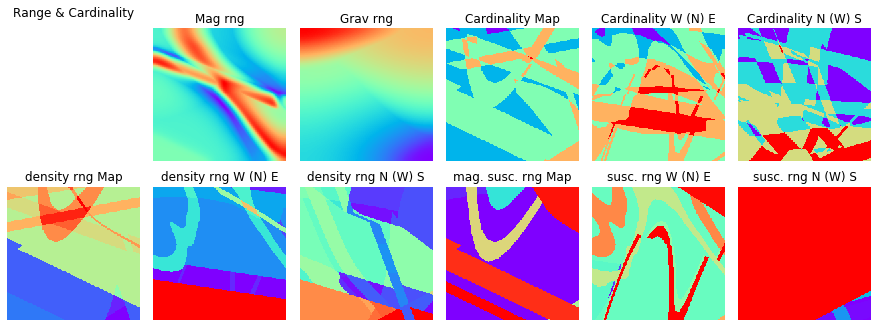

In [4]:
# Range and Cardinality 
fig, ax = plt.subplots(2,6) #,figsize=(13,13)
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[0,2].axis('off')
ax[0,3].axis('off')
ax[0,4].axis('off')
ax[0,5].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')
ax[1,2].axis('off')
ax[1,3].axis('off')
ax[1,4].axis('off')
ax[1,5].axis('off')
ax[0,0].set_title('Range & Cardinality' )
ax[0,1].set_title('Mag rng' ) #title.set_text
ax[0,2].set_title('Grav rng')
ax[0,3].set_title('Cardinality Map')
ax[0,4].set_title('Cardinality W (N) E')
ax[0,5].set_title('Cardinality N (W) S')
ax[1,0].set_title('density rng Map')
ax[1,1].set_title('density rng W (N) E')
ax[1,2].set_title('density rng N (W) S')
ax[1,3].set_title('mag. susc. rng Map')
ax[1,4].set_title('susc. rng W (N) E')
ax[1,5].set_title('susc. rng N (W) S')
ax[0,1].imshow(mag_rng,cmap='rainbow')
ax[0,2].imshow(grv_rng,cmap='rainbow')
ax[0,3].imshow(crd[0,:,:],cmap='rainbow')
ax[0,4].imshow(crd[:,0,:],cmap='rainbow')
ax[0,5].imshow(crd[:,:,0],cmap='rainbow')
ax[1,0].imshow(rho_rng[0,:,:],cmap='rainbow')
ax[1,1].imshow(rho_rng[:,0,:],cmap='rainbow')
ax[1,2].imshow(rho_rng[:,:,0],cmap='rainbow')
ax[1,3].imshow(sus_rng[0,:,:],cmap='rainbow')
ax[1,4].imshow(sus_rng[:,0,:],cmap='rainbow')
ax[1,5].imshow(sus_rng[:,:,0],cmap='rainbow')
fig.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.05, wspace=0.1, hspace=0.1)
plt.show()



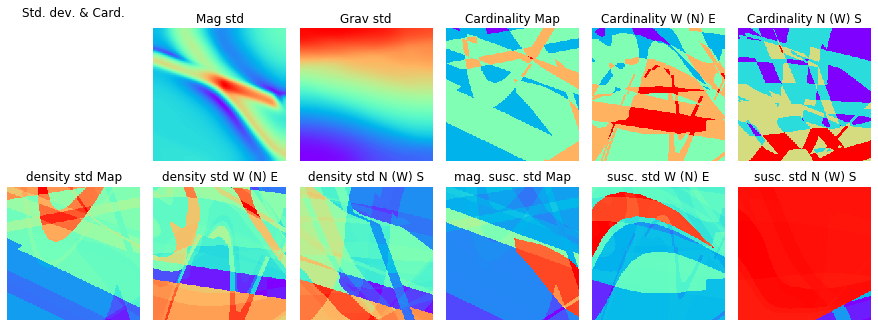

In [5]:
# Standard deviation and Cardinality
fig, ax = plt.subplots(2,6) #,figsize=(13,13)
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[0,2].axis('off')
ax[0,3].axis('off')
ax[0,4].axis('off')
ax[0,5].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')
ax[1,2].axis('off')
ax[1,3].axis('off')
ax[1,4].axis('off')
ax[1,5].axis('off')
ax[0,0].set_title('Std. dev. & Card.' )
ax[0,1].set_title('Mag std' ) #title.set_text
ax[0,2].set_title('Grav std')
ax[0,3].set_title('Cardinality Map')
ax[0,4].set_title('Cardinality W (N) E')
ax[0,5].set_title('Cardinality N (W) S')
ax[1,0].set_title('density std Map')
ax[1,1].set_title('density std W (N) E')
ax[1,2].set_title('density std N (W) S')
ax[1,3].set_title('mag. susc. std Map')
ax[1,4].set_title('susc. std W (N) E')
ax[1,5].set_title('susc. std N (W) S')
ax[0,1].imshow(mag_std,cmap='rainbow')
ax[0,2].imshow(grv_std,cmap='rainbow')
ax[0,3].imshow(crd[0,:,:],cmap='rainbow')
ax[0,4].imshow(crd[:,0,:],cmap='rainbow')
ax[0,5].imshow(crd[:,:,0],cmap='rainbow')
ax[1,0].imshow(rho_std[0,:,:],cmap='rainbow')
ax[1,1].imshow(rho_std[:,0,:],cmap='rainbow')
ax[1,2].imshow(rho_std[:,:,0],cmap='rainbow')
ax[1,3].imshow(sus_std[0,:,:],cmap='rainbow')
ax[1,4].imshow(sus_std[:,0,:],cmap='rainbow')
ax[1,5].imshow(sus_std[:,:,0],cmap='rainbow')
fig.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.05, wspace=0.1, hspace=0.1)
plt.show()




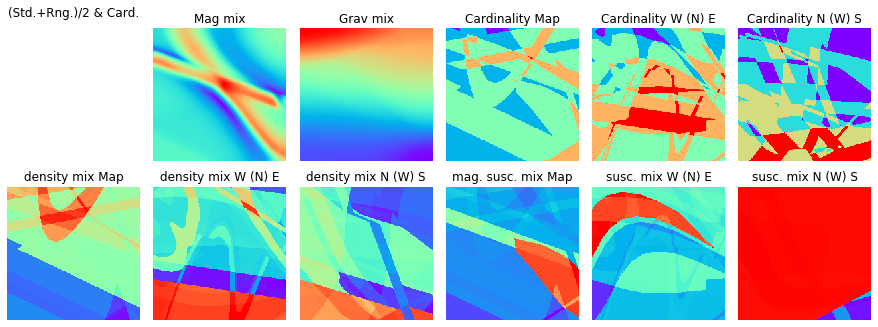

In [6]:
# Mixed indicator and Cardinality
fig, ax = plt.subplots(2,6) #,figsize=(13,13)
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[0,2].axis('off')
ax[0,3].axis('off')
ax[0,4].axis('off')
ax[0,5].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')
ax[1,2].axis('off')
ax[1,3].axis('off')
ax[1,4].axis('off')
ax[1,5].axis('off')
ax[0,0].set_title('(Std.+Rng.)/2 & Card.' )
ax[0,1].set_title('Mag mix' ) #title.set_text
ax[0,2].set_title('Grav mix')
ax[0,3].set_title('Cardinality Map')
ax[0,4].set_title('Cardinality W (N) E')
ax[0,5].set_title('Cardinality N (W) S')
ax[1,0].set_title('density mix Map')
ax[1,1].set_title('density mix W (N) E')
ax[1,2].set_title('density mix N (W) S')
ax[1,3].set_title('mag. susc. mix Map')
ax[1,4].set_title('susc. mix W (N) E')
ax[1,5].set_title('susc. mix N (W) S')
ax[0,1].imshow(mag_rngstd,cmap='rainbow')
ax[0,2].imshow(grv_rngstd,cmap='rainbow')
ax[0,3].imshow(crd[0,:,:],cmap='rainbow')
ax[0,4].imshow(crd[:,0,:],cmap='rainbow')
ax[0,5].imshow(crd[:,:,0],cmap='rainbow')
ax[1,0].imshow(rho_rngstd[0,:,:],cmap='rainbow')
ax[1,1].imshow(rho_rngstd[:,0,:],cmap='rainbow')
ax[1,2].imshow(rho_rngstd[:,:,0],cmap='rainbow')
ax[1,3].imshow(sus_rngstd[0,:,:],cmap='rainbow')
ax[1,4].imshow(sus_rngstd[:,0,:],cmap='rainbow')
ax[1,5].imshow(sus_rngstd[:,:,0],cmap='rainbow')
fig.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.05, wspace=0.1, hspace=0.1)
plt.show()



# Save computed indicators

In [ ]:
with open(picklefilenamecardinality, 'wb') as f:
    pickle.dump([grv_rngstd,mag_rngstd,grv_rng,mag_rng,grv_std,mag_std,crd,rho_rngstd,sus_rngstd,rho_rng,sus_rng,rho_std,sus_std], f)
